<ipython-input-9-9dbd018d06d7>:44: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  veri['Tarih'] = pd.to_datetime(veri['Tarih'])


Model eğitimi başlıyor...
Model eğitimi tamamlandı.


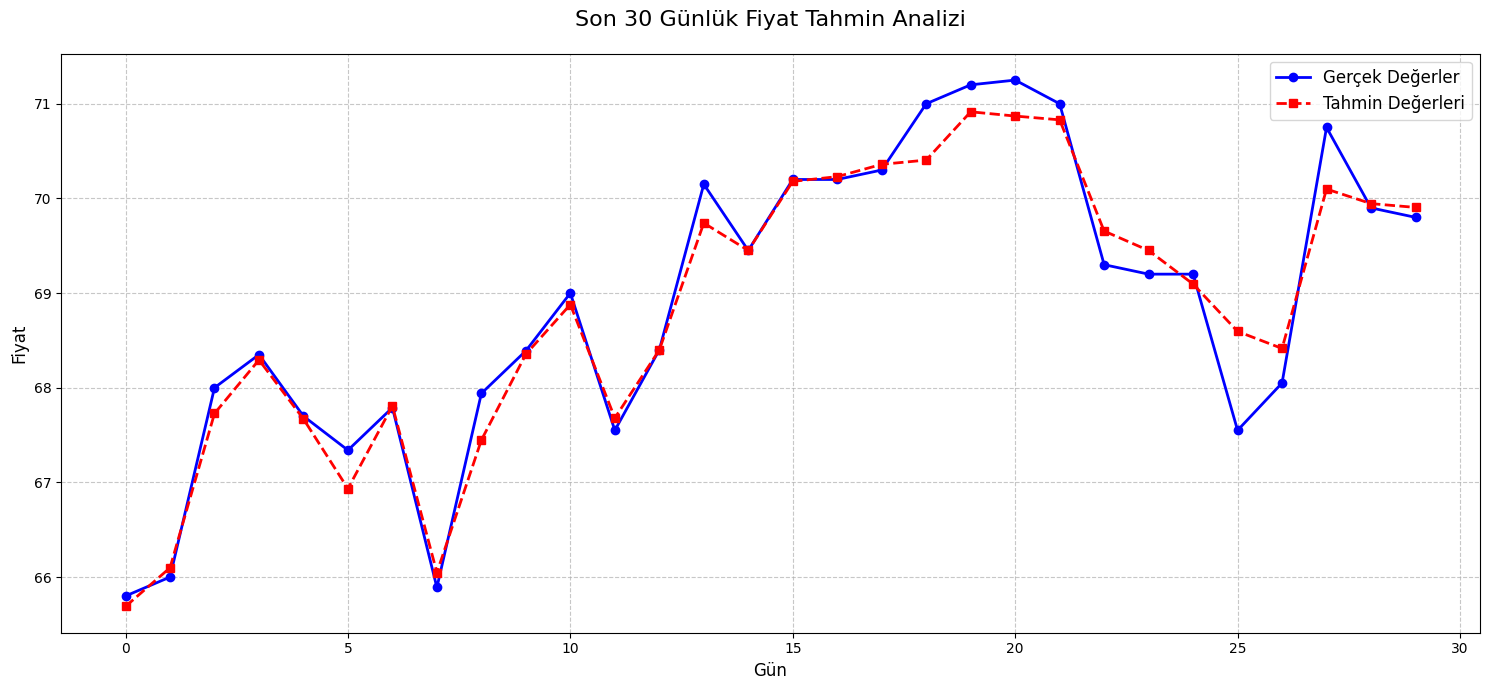


TAHMİN RAPOR
Analiz Tarihi: 20-12-2024
Son Kapanış: 69.80
Tahmin Edilen Değer: 69.91
Tahmini Değişim: %0.15

Teknik Göstergeler:
5 Günlük Ortalama: 69.21
20 Günlük Ortalama: 69.67
Son Gün Volatilite: 1.0290

Model Performans Metrikleri:
Mean Squared Error: 0.0000
R-squared Score: 0.9999


In [9]:
# ====================== KÜTÜPHANE TANIMLARI VE AMAÇLARI ======================
# pandas: veri manipülasyonu analizi için pythonda yazılmış açık kaynak kodlu kütüphane
# dataframe yapısındadır - bu yapı excel benzeri 2 boyutlu  veri tablosudur
# sütunları farklı veri tiplerinde olabilirr(sayı,metin,tarih gibigibi)
import pandas as pd

# numpy:bilimsel hesaplamalar için temel kütüphane sayılrı
# çok boyutlu diziler ve matrislerle çalışmak için idealdir
import numpy as np

# scikit-learn: makine öğrenimi için kullandığımız en popüler kütüphane
# MinMaxScaler: verilerİ belirli bir aralığa (genellikle 0-1) ölçeklendirmemize yarıyor.
# formülü: (x-min(x))/(max(x)-min(x))
# randomforestregressor: birden çok karar ağacı kullanarak tahmin yapan bir  öğrenme modeli olur.
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

# matplotlib:  grafik oluşturmak için kullandığımız bir kütüphane
# plt alt modülüdür 2D grafikleri çizmek için kullunuyoruz.
import matplotlib.pyplot as plt

# ====================== VERİ YÜKLEME VE ÖN İŞLEME ======================
# csv dosyası: comma separated vvalues (virgülle ayrılmış değerler olarak geçer)
# her satır yeni bir veri kaydını, her sütun ise ffarklı bir özelliği temsil ediyor

# read_csv() fonksiyonu ile csv dosyasını okuyoruz
veri = pd.read_csv('b2.csv')

# dataframe sütunları finansal terimlerle uyumlu Türkçe isimler olarak değiştiriyoruz
# bu isimlendirmeler veri analizi sürecinde kolaylık ve kodun okunulabilirliğini arttırıyor

# 'Tarih': İşlemin gerçekleştiği tarih, datetime formatına çevrilecek.
# 'Kapanis': Günlük kapanış fiyatı, o günkü son işlem fiyatı.
# 'Acilis': Günlük açılış fiyatı, o günkü ilk işlem fiyatı.
# 'Yuksek': Gün içi en yüksek fiyat, o gün ulaşılan en yüksek değer.
# 'Dusuk': Gün içi en düşük fiyat, o gün görülen en düşük değer.
# 'Hacim': Günlük işlem hacmi, alım-satım miktarının toplamı.
# 'DegisimYuzde': Bir önceki güne göre yüzdesel değişim.
veri.columns = ['Tarih','Kapanis','Acilis','Yuksek','Dusuk','Hacim','DegisimYuzde']

# ====================== VERİ TEMİZLEME VE DÖNÜŞÜM ======================
# tarih sütununu datetime formatına çevirmemiz lazım
# datetime formatına çevirmemizin sebebi tarihlerle matematiksel işlemler yapmamıza yarıyor, ör : iki tarih arasında gün farkı hesaplamamızı sağlar
veri['Tarih'] = pd.to_datetime(veri['Tarih'])

# fiyat verilerindeki virgülleri noktalara çevirip sayısal formata dönüştüreceğiz
# Örnegin: "1,234.56" -> 1234.56
# 1.str.replace(',', '.'): virgülleri nokta ile değiştiriyor
# 2.  pd.to_numeric(): metni sayıya çevirir
# 3. errors='coerce': çcevrilemeyen degerleri NaN ie yapar
veri['Kapanis'] = pd.to_numeric(veri['Kapanis'].str.replace(',','.'),errors='coerce')
veri['Acilis'] = pd.to_numeric(veri['Acilis'].str.replace(',','.'),errors='coerce')
veri['Yuksek'] = pd.to_numeric(veri['Yuksek'].str.replace(',','.'),errors='coerce')
veri['Dusuk'] = pd.to_numeric(veri['Dusuk'].str.replace(',','.'),errors='coerce')

# hacimm değerlerinde olan  özel işaretleri sayısal değerlere çevirme
# M (Million) -> 1,000,000 (e6)
# K (Thousand) -> 1,000 (e3)
# Örnek: "1.5M" -> 1,500,000

# str.replace('M', 'e6'):
# buradaki 'M' harfi genellikle milyonları ifade etmek için kullanılıyor
# örnekk, "5M" ifadesi aslında 5 milyon anlamında oluyor.
# Bu kod , 'M' harfini matematiksel bir kısaltma olan 'e6' ile değiştirir 'e6', sayıyı 10'un altı 6. kuvveti olarak ifade ediyor, yani 1 milyon anlamına geleek.
# yani, "5M" ifadesi "5e6" olur ve bu Python'da 5000000 olarak kabul görecek

# str.replace('K', 'e3'):
# 'K' harfi de  binleri ifade eder. Örek, "500K" ifadesi 500 bin anlamına gelir
# Bu kod, 'K' harfini 'e3' ile değiştiriyor. 'e3' ise 10'un 3. kuvvetini, yani 1000'i ifade eder.
# Yani "500K" ifadesi "500e3" olur ve bu pytonda 500000 olarak değerlendiriliyor.

# str.replace(',', '.'):
# ssayılar arasında kullanılan virgülü(örnek "1,000" gibi) noktaya (".") dönüştürecek.
# çünki python  ondalıklı sayıları tanımlarken nokta kullanacak. örnek, "1,5" sayısı Python’da geçerli bir sayı değildir, ancak "1.5" doğru bir sayı formatıdı

# astype(float):
#veriyi float (ondalıklısayı) türüne dönüştürür ub sayede Python, sayısal hesaplamalar yapılacaktır.
veri['Hacim'] = (veri['Hacim'].str.replace('M','e6').str.replace('K','e3').str.replace(',','.').astype(float))



# Yüzde değişim sütunundaki % işaretini kaldırıp sayısal formata çevirme
# Örnek: "%5,23" -> 5.23
veri['DegisimYuzde'] =pd.to_numeric(veri['DegisimYuzde'].str.replace('%','').str.replace(',','.'),errors='coerce')

# veriyi tarihe göre sıralama ve index  yeniden numaralandırma yapacaktırr
# sort_values: belirtilen sütuna göre sıralama yapar (ascending=True ile yani küçükten büyüe sıralama yapıyor)
# reset_index: Indexi 0dan başlayarak yeniden numaralandıracak
# drop=True: Eski indexi bir sütun olarak saklamazzd
veri =veri.sort_values('Tarih',ascending=True).reset_index(drop=True)

# ====================== TEKNİK ANALİZ GÖSTERGELERİ ======================
# hareketli Ortalamalar (MMoving averages)
# belirli bir süre boyunca fiyatların ortalamasını alır
# trenfd yönünü ve momentum değişimlerini tespit etmek için kullanılır.

# hareketli ortalamalar hesaplanıyor
# rolling: Bbbelirtilen pencere boyutunda kaydırılarak işlem yapaacak
# mean: ortalamayı alır
# örnek: 5 günlük hareketli ortalama, son 5 günün kapanış değerlerinin ortalamasıdır
veri['Ortalama5']=veri['Kapanis'].rolling(window=5).mean()

# 20 gün hareketli ortalama(orta vadeli trend göstergesi)
veri['Ortalama20']= veri['Kapanis'].rolling(window=20).mean()


# ====================== ÖZELLİK MÜHENDİSLİĞİ ======================
# fiyat değişimi: bir önceki güne göre yüzdesel değişim oluyor
# formülü: (bugünkü fiyat-dünkü fiyat)/dünkü fiyat * 100
# pct_change: yüzdesel değişimi hesaplr
# örnek: bugün fiyat 100, dün ise 90  değişim (100-90)/90 = 0.111 (%11.1)
veri['Fiyat_Degisimi']=veri['Kapanis'].pct_change()

# yüksek/düşük oranı: günlük volatilite (oynaklık) göstergesi
# yüksek oran -> yüksek volatilite -> riskli piyasa
# düşük oran -> düşük volatilite -> sakin piyasa
veri['Yuksek_Dusuk_Orani']=veri['Yuksek']/veri['Dusuk']

# NaN değerleri temizleyecek
# NaN: Not a Number - Eksik veya geçersiz değerler
# dropna: NaN içeren satırları silecektir
veri=veri.dropna()

# ====================== MODEL HAZIRLIK ======================
# tahmin için kullanılacak özellikler
# Her özellik  bir açıdan fiyat hareketini etkileyen faktörleri temsil ediyor
ozellikler=['Acilis','Yuksek','Dusuk','Hacim','Ortalama5','Ortalama20','Fiyat_Degisimi','Yuksek_Dusuk_Orani']

# 'Acilis' :günün başlangıç fiyatı
# 'Yuksek' :gün içi en yüksek seviye
# 'Dusuk' : gün içi en düşük seviye
# 'Hacim' :işlem hacmi - piyasa aktivitesi göstergesi
# 'Ortalama5' :kısa vadeli trend
# 'Ortalama20' :orta vadeli trend
# 'Fiyat_Degisimi' :momentum göstergesi
# 'Yuksek_Dusuk_Orani' :volatilite göstergesi

#tahmin edilecek hedef değişken oluyor
hedef = 'Kapanis'  #günün kapanış fiyatı

# ====================== VERİ ÖLÇEKLENDİRME ======================
# minmaxscaler: verileri 0-1 aralığına ölçeklendirecek
# formüşü: X_scaled = (X - X_min) / (X_max - X_min)
# feature_range=(0, 1),    # dedef aralık belirliyoruz
# copy=True               # orijinal veriyi koruyacağız
olceklendirici = MinMaxScaler(feature_range=(0,1),copy=True)

# özellikleri ölçeklendirme
# X: bağımsız değişkenler - tahmin için kullanılacak girdiler oluyor
# fit_transform: ölçeklendirme parametrelerini öğrenecek ve uygulayacak
# örnek: [100, 200, 300] -> [0, 0.5, 1]
# veri[ozellikler]     # seçilen özellikleri al)
X = olceklendirici.fit_transform(veri[ozellikler])

# dedef değişkeni ölçeklendireceğiz
# y: bağımlı değişken - tahmin edilecek değer
# veri[[hedef]]        # tek sütunlu DataFrameee çevireceğiz.
y = olceklendirici.fit_transform(veri[[hedef]])

# ====================== RANDOM FOREST MODEL OLUŞTURMA ======================
# RRandomforestregressor: çoklı karar agaçlarından oluşan topluluk öğrenme modeli
#her agaç rastgele seçilen özellikler ve örneklerle eğiteek
#n_estimators=10,          # oluşturulacak ağaç sayısıdır
#max_depth=None,           # ağaçların maksimum derinliğidir(None=sınırsız)
#min_samples_split=2,      # düğüm bölmek için gereken minimum örnek sayısı oluyor
#min_samples_leaf=1,       # yaprak düğümde bulunması gereken minimum örnek sayısıdır
#random_state=42,          # rastgelelik için sabit tohum atıyoruz (tekrarlanabilirlik için)
#n_jobs=-1                 # tüm CPU çekirdeklerini kullanacağız)
model = RandomForestRegressor(n_estimators=10,max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42,n_jobs=-1)

# model eğitimi
# fit: modeli verilerle eğitecek
# X: özellikler (giriş değişkenleri)
# y.ravel(): hedef değişkeni 1 boyutlu diziye çevir
print("Model eğitimi başlıyor...")
model.fit(X, y.ravel())
print("Model eğitimi tamamlandı.")

# ====================== MODEL DEĞERLENDİRME VE TAHMİN ======================
# tüm veri seti için tahmin yapar
# predict: eğitilmiş modeli kullanarak tahmin yapaacaktır
tahmin = model.predict(X)
# ====================== VİZUALİZASYON ======================
# matplotlib ile görselleştirme yapacağız

#grafik boyutunu ayarlıyoruz (genişlik,yükseklik)
plt.figure(figsize=(15,7))  # 'figsize' parametresi, grafiğin genişlik ve yüksekliğini belirliyor
# Örneğin, figsize=(15,7) grafiği 15 birim genişliğinde ve 7 birim yüksekliğinde oluşturacaktır

# gerçek değerleri çizeceğiz

# olceklendirici.inverse_transform(y.reshape(-1, 1))[-30:],  # Son 30 günün gerçek fiyat verileri
# label='Gerçek Değerler',  # grafikte gösterilecek etiket adı
# color='blue',  # cizgi rengi 'mavi' olacak
# linewidth=2,  # cizgi kalınlığı
# marker='o',  # veri noktalarını işaretlemek için 'daire' (circle) şeklidir
# markersize=6  # işaretçi boyutunu ayarlıyoruz
# )
plt.plot(olceklendirici.inverse_transform(y.reshape(-1, 1))[-30:],label='Gerçek Değerler',color='blue',linewidth=2,marker='o',markersize=6)

# tahmin değerlerini çizeceğiz
# olceklendirici.inverse_transform(tahmin.reshape(-1, 1))[-30:],  # son 30 günün tahmin verileri
# label='Tahmin Değerleri',  # grafikte gösterilecek etiket adı
# color='red',  # çizgi rengi 'kırmızı' olarak belirlenmiştir
# linewidth=2,  # .izgi kalınlığı
# linestyle='--',  # cizgi stili 'kesikli' (dashed) olarak belirledil
# marker='s',  # veri noktalarını işaretlemek için 'kare' (square) şekli kullandık
# markersize=6  # işaretçi boyutunu ayarlıyoruz
plt.plot(olceklendirici.inverse_transform(tahmin.reshape(-1, 1))[-30:],label='Tahmin Değerleri',color='red',linewidth=2,linestyle='--',marker='s',  markersize=6)

#grafik başlığını ve etiketlerini ekleyeceğiz..
# fontsize=16,  # başlık yazısının font büyüklüğü oluyor
#  pad=20)  # başlık ile grafik arasındaki boşluğu ayarladık
plt.title('Son 30 Günlük Fiyat Tahmin Analizi',fontsize=16,pad=20)
plt.xlabel('Gün', fontsize=12)  # X ekseninin etiketini 'Gün' olarak belirdelik
plt.ylabel('Fiyat', fontsize=12)  # Y ekseninin etiketini 'Fiyat' olarak belirledik

# grafik üzerinde ızgara (grid) çizgilerini ekledik
plt.grid(True, linestyle='--', alpha=0.7)
# 'true' parametresi ile ızgara çizgilerini etkinleştiriyoruzd
# 'linestyle' parametresi ile çizgi stilini 'kesikli' (dashed) olarak belirdelik
# 'alpha' parametresi ile ızgara çizgilerinin saydamlık seviyesini ayarlıyoruz (0ve1 arasında bir değer)

#grafikteki etiketlerin görünürlüğünü artırmak için bir gösterge ekliyorum
plt.legend(fontsize=12)  #'fontsize' parametresi ile gösterge etiketlerinin yazı boyutunu ayarladım

#grafik kenar boşluklarını otomatik olarak düzenlenir
plt.tight_layout()  #bu fonksiyon, grafik öğelerinin kenarlara taşmasını engeller ve görselleştirmeyi sıkıştırır

#grafiği ekrana yazdırdık
plt.show()  #grafik çizildikten sonra ekranda gösterilecek


# ====================== GELECEK TAHMİNİ ======================
#son gün verilerini kullanarak bir sonraki gün tahmini yapılacak

# sonraki_tahmin = model.predict([X[-1]]):
# bu satırda, modelin predict() fonksiyonu tahmin yapacağız
# X[-1]: X verisi modelin girdi verilerini(özelliklerini) içeriyor. [-1] ifadesi,
# son elemanı (son gün verisi) alacaktır son günün tüm özelliklerinin (fiyat, hacim, gibibi.)
# modelin girişine verilmesi anlamına gelecek
# model, bu veriyi kullanarak bir tahmin yapıyor. çıktı, genellikle bir liste veya dizi olacak
sonraki_tahmin = model.predict([X[-1]])  # son günün özelliklerini kullanacagız

# tahmini gerçek değere çevir
# inverse_transform: ölçeklendirdiğimiz değeri orijinal ölçeğe geri döndürecek

# sonraki_fiyat = olceklendirici.inverse_transform([[sonraki_tahmin[0]]])[0][0]:
# Tahmin edilen değerler genellikle ölçeklendirilmiş (standartlaştırılmış veya normalize edilmiş) olur,
# bu nedenle gerçek değere dönüştürülmesi gerekiyor.
# olceklendirici.inverse_transform(): bu fonksiyon, ölçeklendirilmiş veriyi orijinal (gerçek) değerine döndürmek için kullanılacak.
# olceklendirici, veri ölçeklendirmesi sırasında kullanılan scaler (örnek, MinMaxScaler, StandardScaler gibi) nesnesidir.
# [[sonraki_tahmin[0]]]: Bu şekilde, tahmin edilen değeri bir liste içine alıyoruz, çünkü inverse_transform fonksiyonu
# 2D bir veri bekliyor.
# [0][0]: inverse_transform fonksiyonu bir 2D liste döndürdüğü icın ilk elemanı (yani tahmin edilen değeri) almak
# için bu indekse başvurulur. Sonuçta elde edilen sonraki_fiyat orijinal fiyat ölçeğine geri dönüştürülmüş tahmin
# edilen değeri içerir.
sonraki_fiyat = olceklendirici.inverse_transform([[sonraki_tahmin[0]]])[0][0]

#s on kapanış değerini al

# son_kapanis = veri['Kapanis'].iloc[-1]:
# bu satırda, veri setindeki son kapanış fiyatını alacakız.
# veri['Kapanis']: veri setindeki 'Kapanis' sütununu temsil ediyor busütun, günlük kapanış fiyatlarını içeriyor olacak.
# iloc[-1]: iloc, pandas veri çerçevesinde (DataFrame) konum tabanlı indeksleme yapmamızed sağlıyor. [-1] ile, son satırı alıyoruz yani son günün kapanış fiyatı oluyor.
son_kapanis = veri['Kapanis'].iloc[-1]

#tahmini değişim yüzdesi hesaplayırouz

# degisim_yuzdesi = ((sonraki_fiyat - son_kapanis) / son_kapanis) * 100:
# bu satır bir sonraki günün tahmin edilen fiyatı ile mevcut (son kapanış) fiyat arasındaki değişim yüzdesinihesaplıyoruz
# formül: ((sonraki_fiyat-son_kapanis)/son_kapanis) *100
# (sonraki_fiyat - son_kapanis): fiyat değişimi (yani, bir sonraki fiyat ile mevcut fiyat arasındaki fark olacaktır).
# sonraki_fiyat / son_kapanis: Bufiyatın artışını (veya azalışını) oran olarak ifade ediyor.
# *100: yüzde cinsinden sonuç almak için bu oranı 100 ile çarpmamız gerekiyor.
# sonu.ta degisim_yuzdesi, bir sonraki gün tahmin edilen fiyatın, mevcut fiyatla karşılaştırıldığında ne kadar artacağı veya azalacağı yüzdesel olarak hesaplanmış oluyor
degisim_yuzdesi = ((sonraki_fiyat - son_kapanis) / son_kapanis) * 100

# ====================== SONUÇLARI RAPORLA ======================
print("\n" + "="*50)
print("TAHMİN RAPOR")
print("="*50)
print(f"Analiz Tarihi: {veri['Tarih'].iloc[-1].strftime('%d-%m-%Y')}")
print(f"Son Kapanış: {son_kapanis:.2f}")
print(f"Tahmin Edilen Değer: {sonraki_fiyat:.2f}")
print(f"Tahmini Değişim: %{degisim_yuzdesi:.2f}")
print("\nTeknik Göstergeler:")
print(f"5 Günlük Ortalama: {veri['Ortalama5'].iloc[-1]:.2f}")
print(f"20 Günlük Ortalama: {veri['Ortalama20'].iloc[-1]:.2f}")
print(f"Son Gün Volatilite: {veri['Yuksek_Dusuk_Orani'].iloc[-1]:.4f}")
print("="*50)


#model performans metriklerini hesapla
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, tahmin)
r2 = r2_score(y, tahmin)

print("\nModel Performans Metrikleri:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")